In [3]:
import sys
sys.path.append('../')

import keras_tuner as kt
import pandas as pd
import tensorflow as tf
from Utils import *

## FNN Model

#### Import data (ESC-10)

In [5]:
# import the .pkl file
df = pd.read_pickle("../esc10.pkl")
print('Shape of the dataframe:', df.shape)
mel_shape = df.mel_spectrogram[0].shape
print('Shape of a mel spectrogram:', mel_shape)
df.head()

Shape of the dataframe: (1600, 4)
Shape of a mel spectrogram: (128, 155)


,mel_spectrogram,target,fold,original
0,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",0,1,True
1,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",0,1,False
2,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",0,1,False
3,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",0,1,False
4,"[[0.9999999, 0.851576, 0.36829507, 0.39175826,...",0,1,True


#### Define the initialization model function

layer_1_neurons : 1088 \
layer_2_neurons : 1984 \
layer_3_neurons : 480 \
layer_1_dropout : 0.4 \
layer_2_dropout : 0.3 \
layer_3_dropout : 0.3 \
layer_1_activation : relu \
layer_2_activation : tanh \
layer_3_activation : relu

In [6]:
def init_model():
    input = tf.keras.layers.Input(shape=(mel_shape[0], mel_shape[1]))
    x = tf.keras.layers.Flatten()(input)
    x = tf.keras.layers.Dense(1088, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    x = tf.keras.layers.Dense(1984, activation='tanh')(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(480, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    output = tf.keras.layers.Dense(10, activation='softmax')(x)

    model = tf.keras.Model(inputs=input, outputs=output)

    # compile
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model 

#### Model Summary

In [7]:
model = init_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 155)]        0         
                                                                 
 flatten (Flatten)           (None, 19840)             0         
                                                                 
 dense (Dense)               (None, 1088)              21587008  
                                                                 
 dropout (Dropout)           (None, 1088)              0         
                                                                 
 dense_1 (Dense)             (None, 1984)              2160576   
                                                                 
 dropout_1 (Dropout)         (None, 1984)              0         
                                                                 
 dense_2 (Dense)             (None, 480)               952800

#### Training and results

Fold 1/5
Pre-training accuracy: 12.5 %
Epoch 1/12
40/40 [==============================] - 6s 122ms/step - loss: 2.4146 - accuracy: 0.2492 - val_loss: 1.6796 - val_accuracy: 0.2875
Epoch 2/12
40/40 [==============================] - 4s 107ms/step - loss: 1.7281 - accuracy: 0.3664 - val_loss: 1.6014 - val_accuracy: 0.3875
Epoch 3/12
40/40 [==============================] - 4s 107ms/step - loss: 1.6204 - accuracy: 0.4047 - val_loss: 1.3925 - val_accuracy: 0.4000
Epoch 4/12
40/40 [==============================] - 4s 112ms/step - loss: 1.5233 - accuracy: 0.4023 - val_loss: 1.3852 - val_accuracy: 0.4125
Epoch 5/12
40/40 [==============================] - 4s 108ms/step - loss: 1.4531 - accuracy: 0.4313 - val_loss: 1.3055 - val_accuracy: 0.5125
Epoch 6/12
40/40 [==============================] - 4s 107ms/step - loss: 1.3602 - accuracy: 0.4781 - val_loss: 1.4250 - val_accuracy: 0.4250
Epoch 7/12
40/40 [==============================] - 4s 105ms/step - loss: 1.3338 - accuracy: 0.4945 - val_los

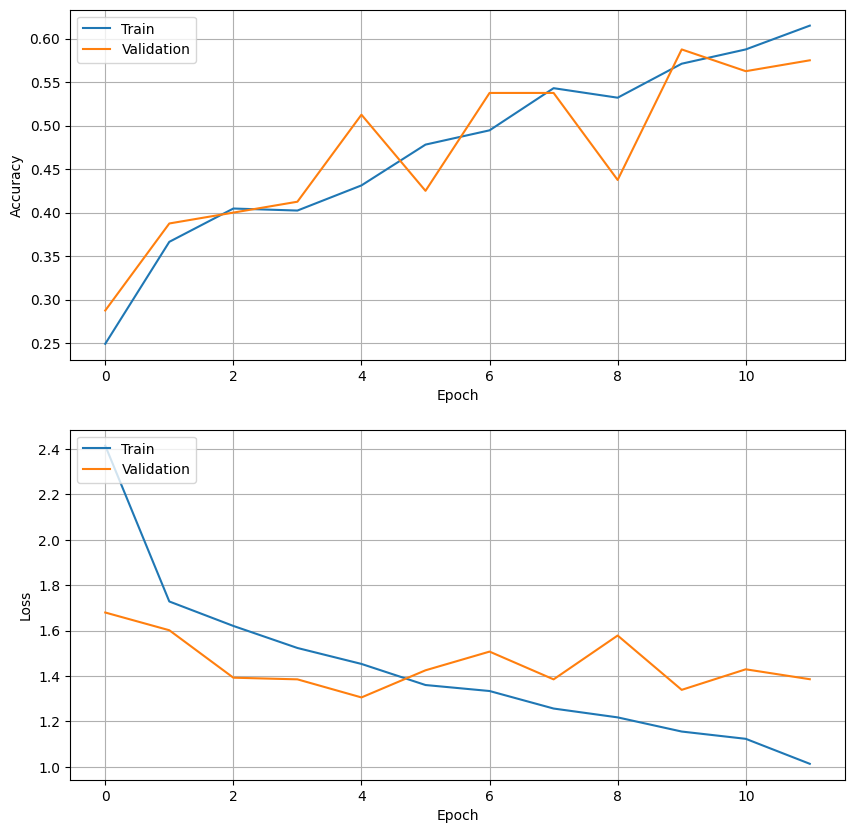

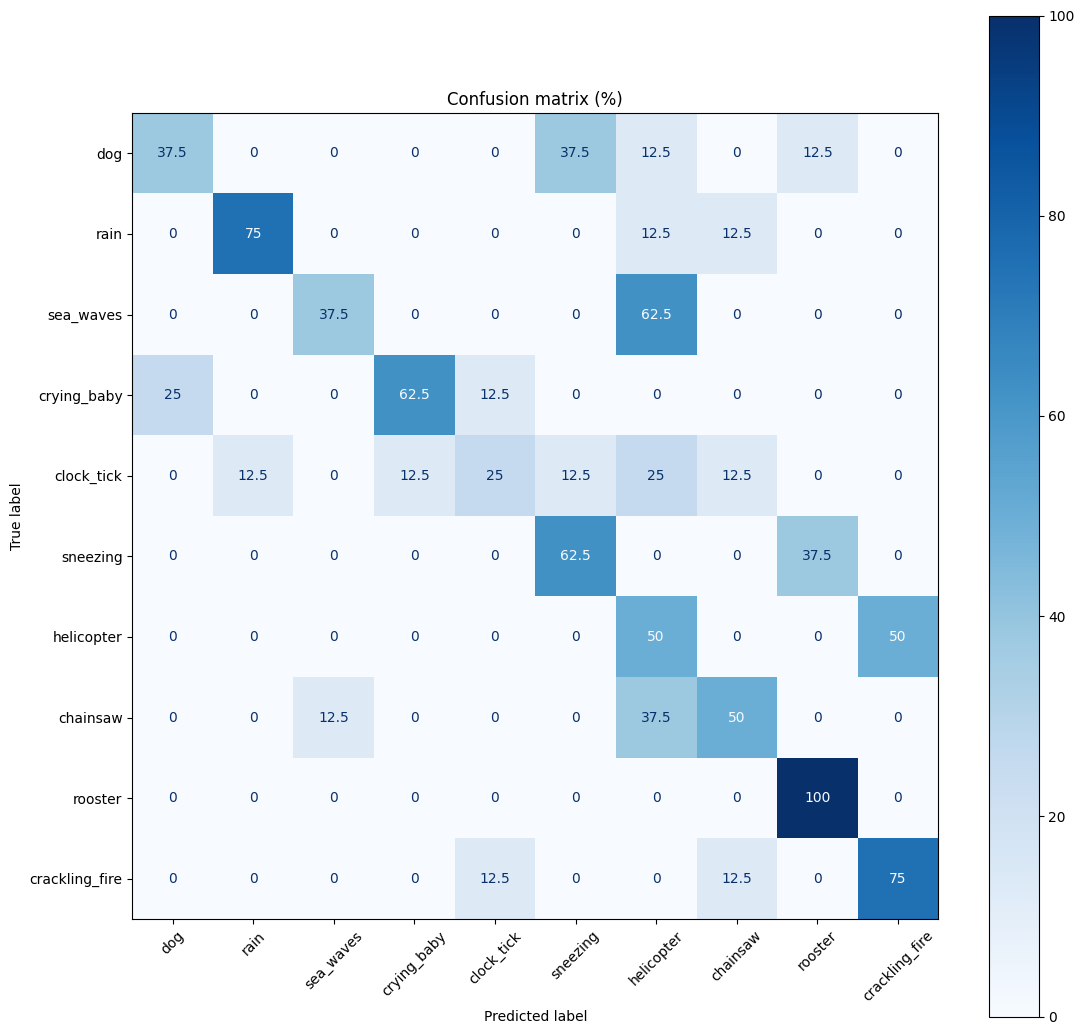

Fold 2/5
Pre-training accuracy: 16.249999403953552 %
Epoch 1/12
40/40 [==============================] - 5s 113ms/step - loss: 2.3878 - accuracy: 0.2562 - val_loss: 1.6564 - val_accuracy: 0.3375
Epoch 2/12
40/40 [==============================] - 4s 109ms/step - loss: 1.7669 - accuracy: 0.3266 - val_loss: 1.5523 - val_accuracy: 0.4375
Epoch 3/12
40/40 [==============================] - 4s 106ms/step - loss: 1.6224 - accuracy: 0.4023 - val_loss: 1.3698 - val_accuracy: 0.4625
Epoch 4/12
40/40 [==============================] - 4s 107ms/step - loss: 1.5281 - accuracy: 0.4141 - val_loss: 1.4112 - val_accuracy: 0.4500
Epoch 5/12
40/40 [==============================] - 4s 109ms/step - loss: 1.4975 - accuracy: 0.4344 - val_loss: 1.3713 - val_accuracy: 0.4500
Epoch 6/12
40/40 [==============================] - 4s 112ms/step - loss: 1.4110 - accuracy: 0.4500 - val_loss: 1.3150 - val_accuracy: 0.4875
Epoch 7/12
40/40 [==============================] - 4s 108ms/step - loss: 1.3119 - accuracy: 0.

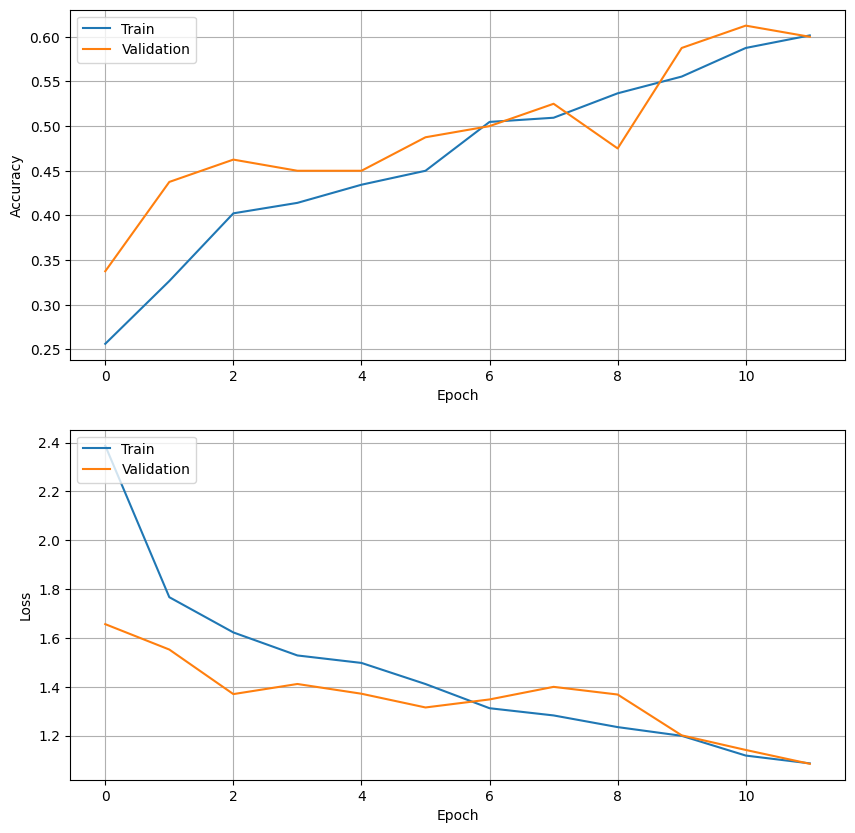

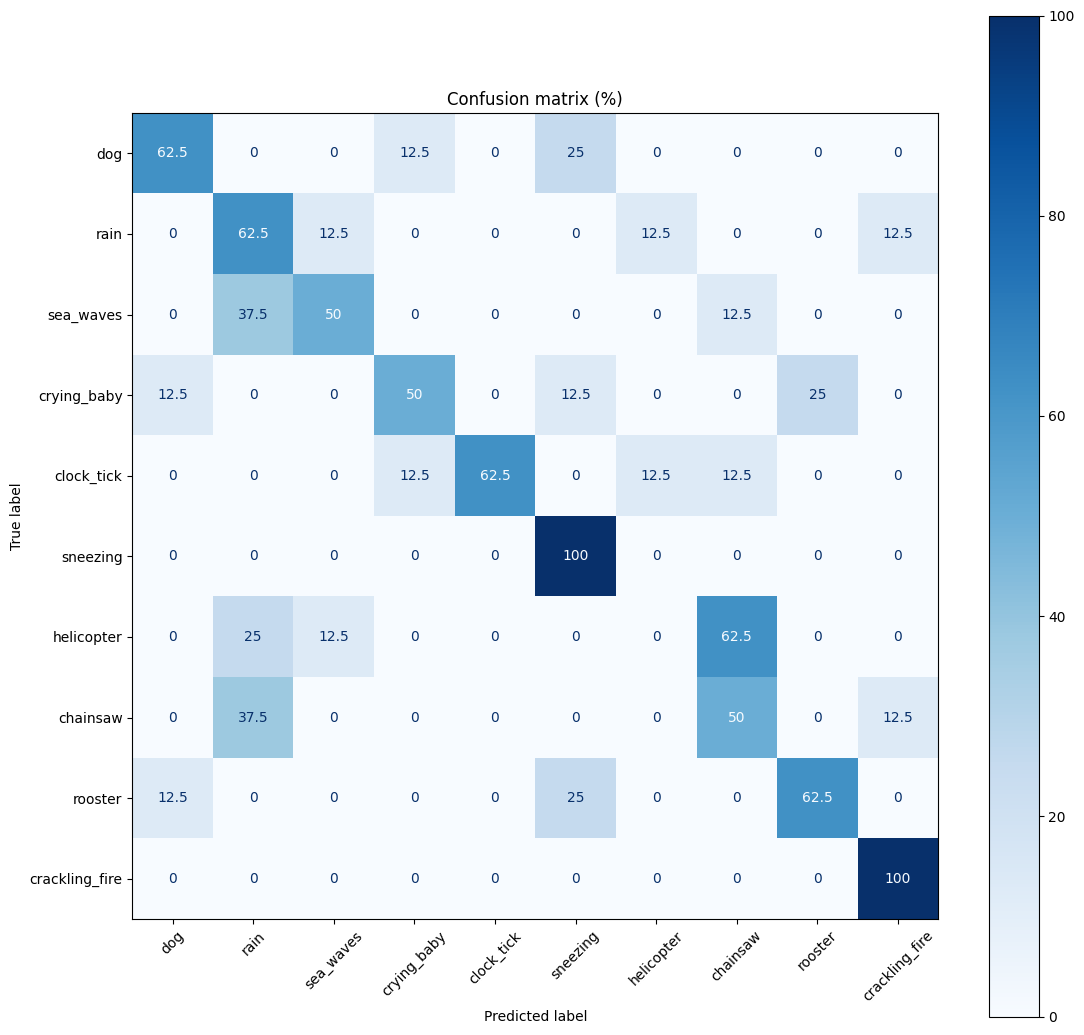

Fold 3/5
Pre-training accuracy: 18.75 %
Epoch 1/12
40/40 [==============================] - 5s 111ms/step - loss: 2.3797 - accuracy: 0.2828 - val_loss: 1.7670 - val_accuracy: 0.3500
Epoch 2/12
40/40 [==============================] - 4s 108ms/step - loss: 1.6573 - accuracy: 0.3922 - val_loss: 1.8470 - val_accuracy: 0.3500
Epoch 3/12
40/40 [==============================] - 4s 108ms/step - loss: 1.5064 - accuracy: 0.4117 - val_loss: 1.9140 - val_accuracy: 0.3125
Epoch 4/12
40/40 [==============================] - 4s 106ms/step - loss: 1.4235 - accuracy: 0.4570 - val_loss: 1.8524 - val_accuracy: 0.4125
Epoch 5/12
40/40 [==============================] - 4s 109ms/step - loss: 1.3149 - accuracy: 0.5031 - val_loss: 1.8256 - val_accuracy: 0.4125
Epoch 6/12
40/40 [==============================] - 4s 110ms/step - loss: 1.2790 - accuracy: 0.5242 - val_loss: 1.8318 - val_accuracy: 0.4500
Epoch 7/12
40/40 [==============================] - 4s 107ms/step - loss: 1.1905 - accuracy: 0.5516 - val_lo

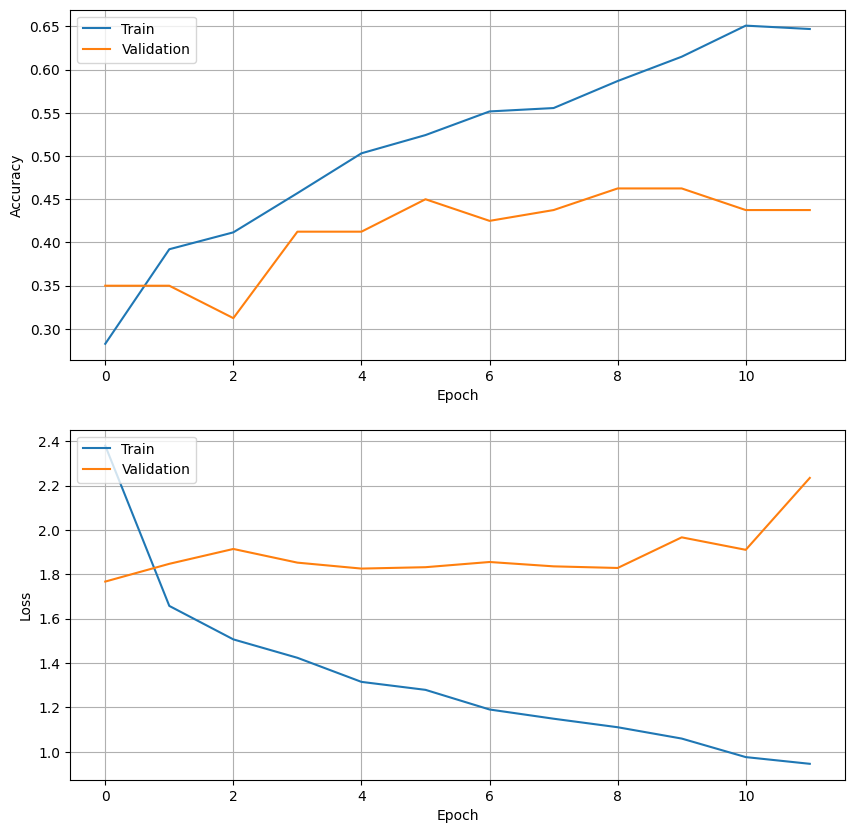

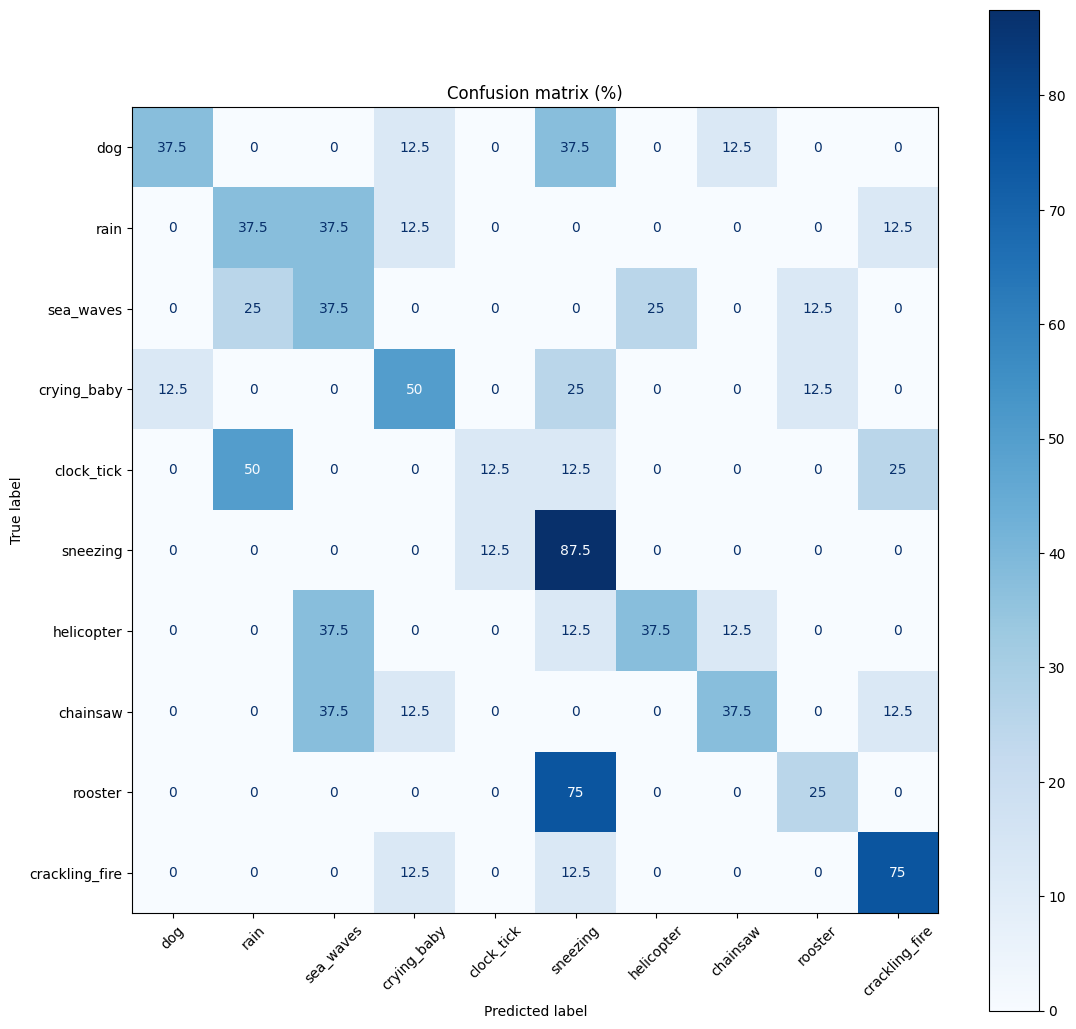

Fold 4/5
Pre-training accuracy: 20.000000298023224 %
Epoch 1/12
40/40 [==============================] - 6s 123ms/step - loss: 2.3621 - accuracy: 0.2898 - val_loss: 1.6899 - val_accuracy: 0.2875
Epoch 2/12
40/40 [==============================] - 4s 106ms/step - loss: 1.7182 - accuracy: 0.3680 - val_loss: 1.5234 - val_accuracy: 0.3500
Epoch 3/12
40/40 [==============================] - 4s 110ms/step - loss: 1.5628 - accuracy: 0.4180 - val_loss: 1.5366 - val_accuracy: 0.3375
Epoch 4/12
40/40 [==============================] - 4s 109ms/step - loss: 1.5084 - accuracy: 0.4250 - val_loss: 1.6248 - val_accuracy: 0.3125
Epoch 5/12
40/40 [==============================] - 4s 106ms/step - loss: 1.3919 - accuracy: 0.4852 - val_loss: 1.4224 - val_accuracy: 0.4875
Epoch 6/12
40/40 [==============================] - 4s 107ms/step - loss: 1.3575 - accuracy: 0.5031 - val_loss: 1.4429 - val_accuracy: 0.4375
Epoch 7/12
40/40 [==============================] - 4s 108ms/step - loss: 1.2460 - accuracy: 0.

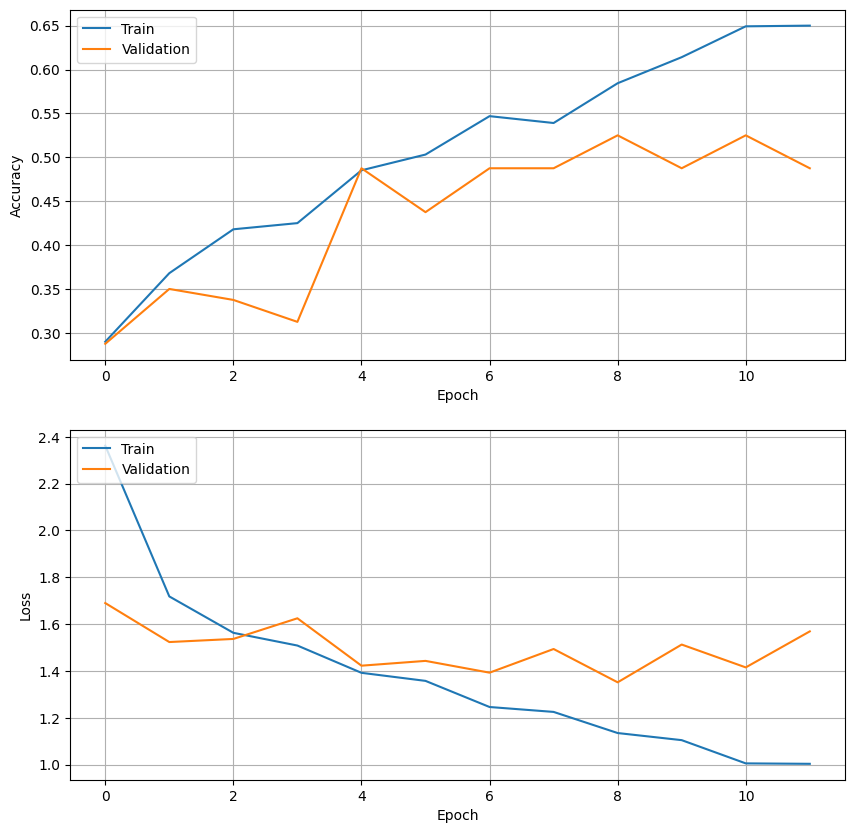

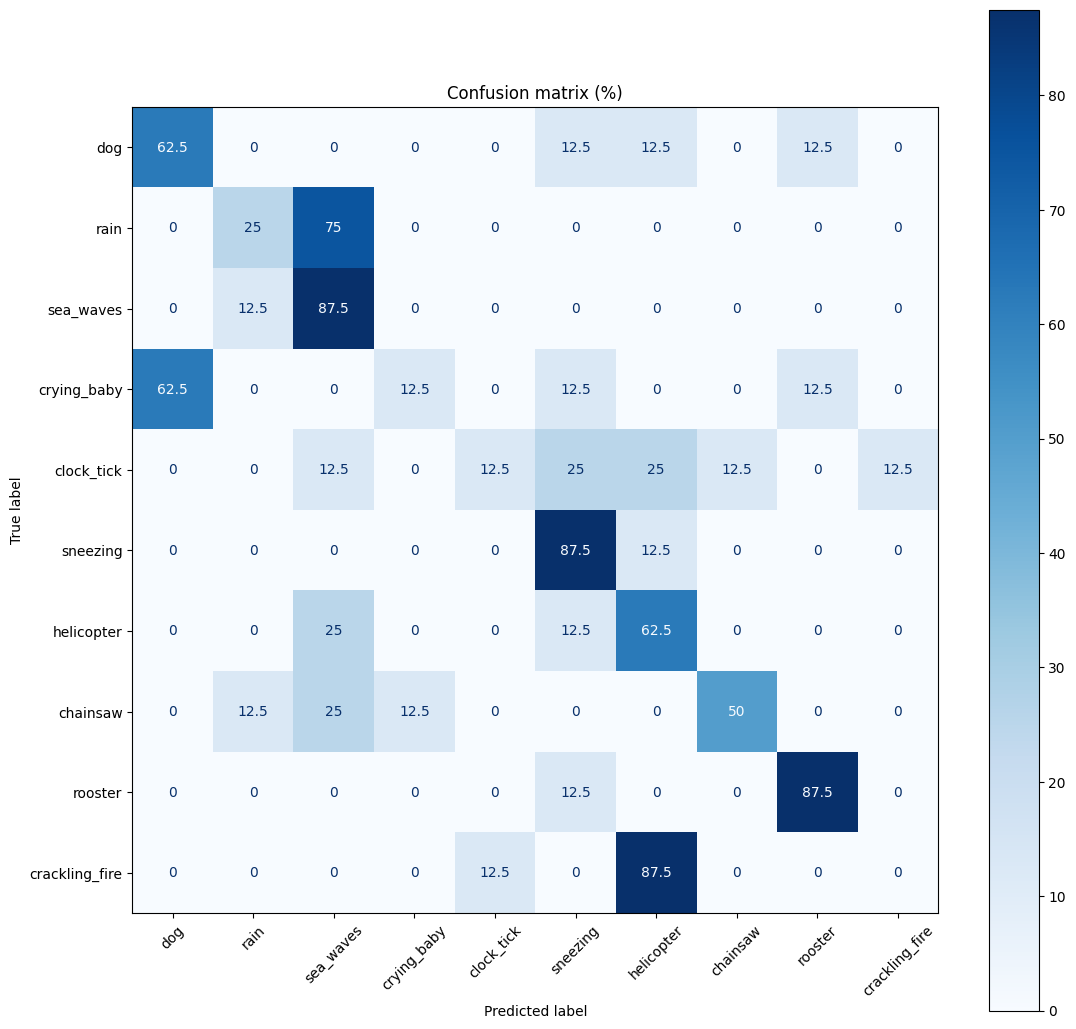

Fold 5/5
Pre-training accuracy: 11.249999701976776 %
Epoch 1/12
40/40 [==============================] - 5s 114ms/step - loss: 2.3684 - accuracy: 0.3078 - val_loss: 1.8741 - val_accuracy: 0.3125
Epoch 2/12
40/40 [==============================] - 4s 110ms/step - loss: 1.7316 - accuracy: 0.3445 - val_loss: 1.6945 - val_accuracy: 0.3250
Epoch 3/12
40/40 [==============================] - 4s 92ms/step - loss: 1.5729 - accuracy: 0.4141 - val_loss: 1.7243 - val_accuracy: 0.3375
Epoch 4/12
40/40 [==============================] - 4s 91ms/step - loss: 1.5306 - accuracy: 0.4203 - val_loss: 1.6258 - val_accuracy: 0.4750
Epoch 5/12
40/40 [==============================] - 4s 91ms/step - loss: 1.4270 - accuracy: 0.4633 - val_loss: 1.6168 - val_accuracy: 0.3375
Epoch 6/12
40/40 [==============================] - 4s 91ms/step - loss: 1.3758 - accuracy: 0.4789 - val_loss: 1.6331 - val_accuracy: 0.3625
Epoch 7/12
40/40 [==============================] - 4s 90ms/step - loss: 1.3457 - accuracy: 0.5023 

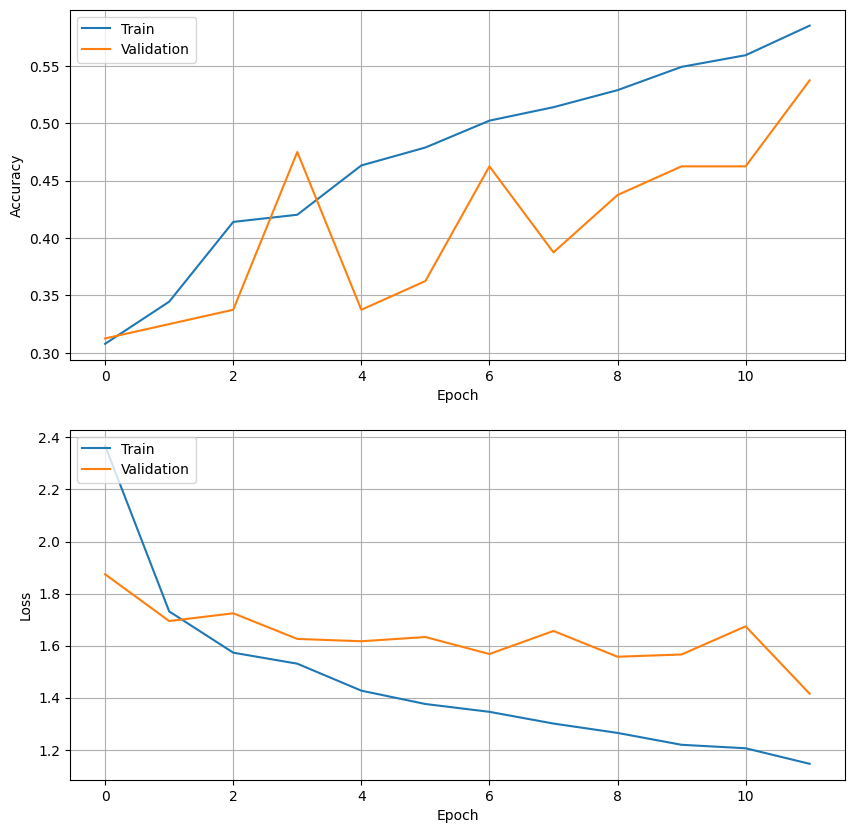

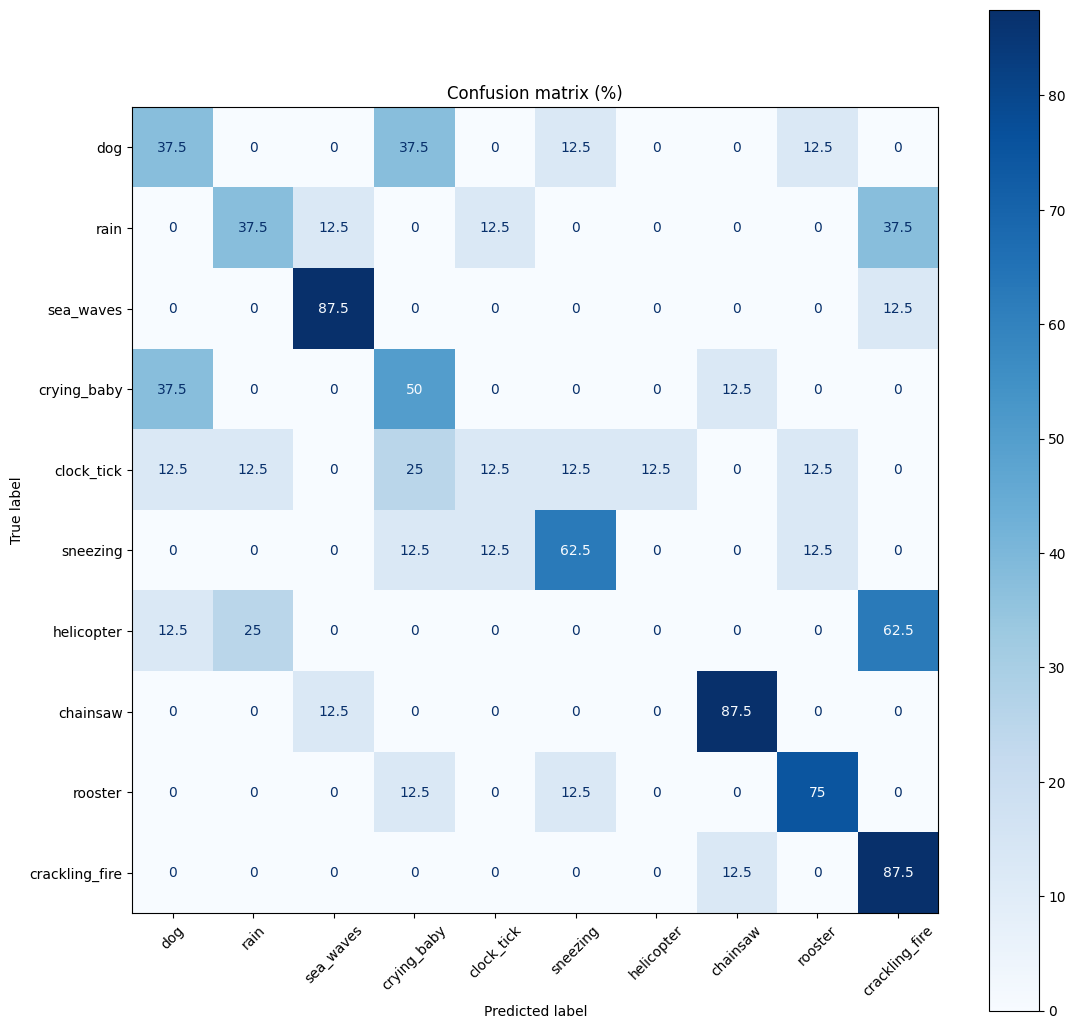

Average results:

Average accuracy: 0.62 ± 0.03
Average validation accuracy: 0.53 ± 0.06
Average loss: 1.04 ± 0.07
Average validation loss: 1.54 ± 0.38
Average training time: 51.74 ± 2.82 s

Plotting average results:



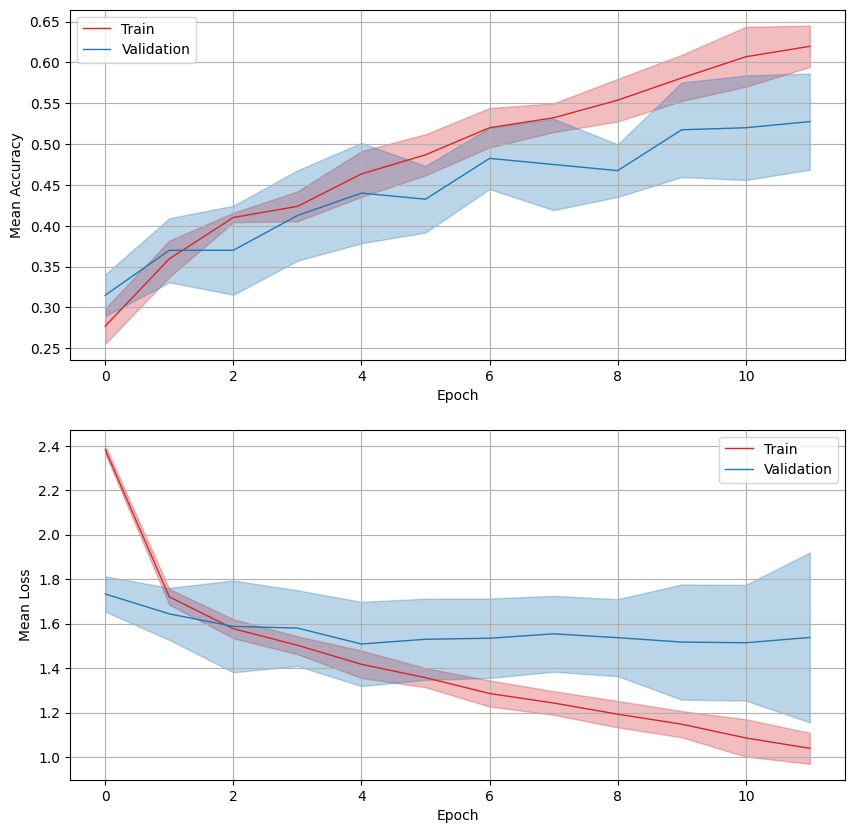

Average confusion matrix:



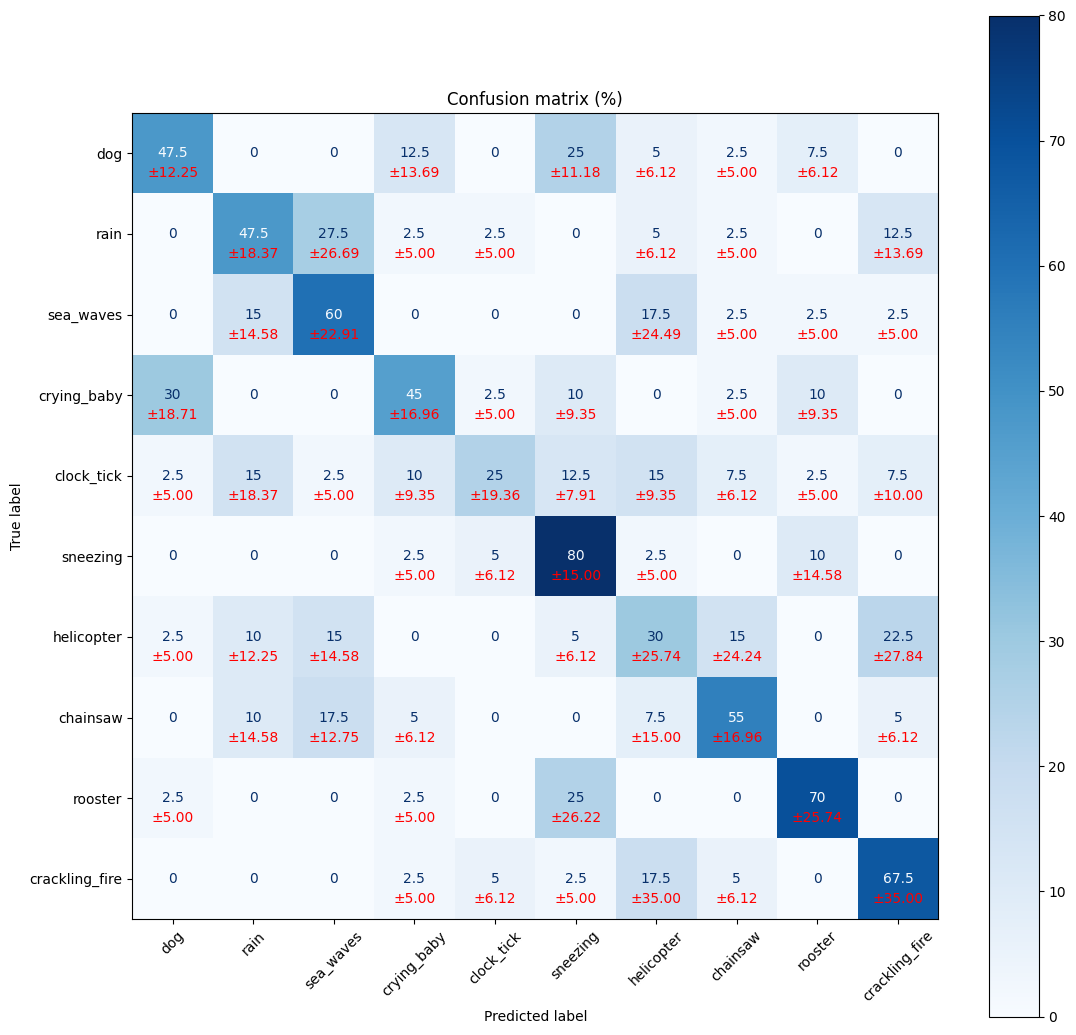

In [11]:
x_dim = (mel_shape[0], mel_shape[1])
history = cross_validation(df, init_model, X_dim=x_dim, n_folds=5, epochs=12, num_batch_size=32, verbose=1)